In [264]:
import pandas as pd
import numpy as np
import math
import seaborn as sb

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score
import pickle
#https://docs.google.com/spreadsheets/d/1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA/edit?usp=sharing

In [177]:

from io import BytesIO
import requests
spreadsheet_id = '1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))


In [178]:
df.info()

# Convert string to datetime

df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%Y-%m-%d')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%Y-%m-%d')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
MMM-YY                  19104 non-null object
Emp_ID                  19104 non-null int64
Age                     19104 non-null int64
Gender                  19104 non-null object
City                    19104 non-null object
Education_Level         19104 non-null object
Salary                  19104 non-null int64
Dateofjoining           19104 non-null object
LastWorkingDate         1616 non-null object
Joining Designation     19104 non-null int64
Designation             19104 non-null int64
Total Business Value    19104 non-null int64
Quarterly Rating        19104 non-null int64
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [179]:
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())  

In [180]:
get_info(df)

Head:


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
MMM-YY                  19104 non-null datetime64[ns]
Emp_ID                  19104 non-null int64
Age                     19104 non-null int64
Gender                  19104 non-null object
City                    19104 non-null object
Education_Level         19104 non-null object
Salary                  19104 non-null int64
Dateofjoining           19104 non-null datetime64[ns]
LastWorkingDate         1616 non-null datetime64[ns]
Joining Designation     19104 non-null int64
Designation             19104 non-null int64
Total Business Value    19104 non-null int64
Quarterly Rating        19104 non-null int64
dtypes: datetime64[ns](3), int64(7), object(3)
memory usage: 1.9+ MB


None


Description of quantitative parameters:


,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000



Description of categorical parameters:


,Gender,City,Education_Level
count,19104,19104,19104
unique,2,29,3
top,Male,C20,Bachelor
freq,11103,1008,6864



Columns with NaN values:


MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64


Shape:


(19104, 13)


Number of duplicated rows:


0

In [181]:
df['Emp_ID'].nunique()

2381

In [182]:
ids = df['Emp_ID'].unique()

In [183]:
df['Education_Level'].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

## Check whether education level changed

In [184]:
def education(df, id):
    temp = df.loc[df['Emp_ID'] == id]
    if temp['Education_Level'].nunique() > 1:
        return True
    else:
        return False

In [185]:
counter = 0
for i in ids:
    if (education(df, i)):
        counter = counter + 1
        
print(counter)

0


## Compare Designation and Salary

In [186]:
salary_ids = []
def salary(df, id):
    temp = df.loc[df['Emp_ID'] == id]
    if temp['Salary'].nunique() > 1:
        salary_ids.append(id)
        return True
    else:
        return False
    
designation_ids = []
def designation(df, id):
    temp = df.loc[df['Emp_ID'] == id]
    if temp['Designation'].nunique() > 1:
        designation_ids.append(id)
        return True
    else:
        return False

In [187]:
counter = 0
for i in ids:
    salary(df,i)
    designation(df,i)

In [188]:
print(len(salary_ids))
#print(designation_ids)

if (salary_ids == designation_ids):
    print('Salary changed only for the people who had designation changed')

44
Salary changed only for the people who had designation changed


## Add columns

In [189]:
employee_dfs = [df[df['Emp_ID'] == i] for i in ids]
employee_features = {}
for employee_df in employee_dfs:
    id = employee_df.iloc[0]['Emp_ID']
    employee_features[id] = {}
    
    employee_features[id]['Emp_ID'] = id
    employee_features[id]['Salary Change'] = (employee_df['Salary'].max() - employee_df['Salary'].min()) / employee_df['Salary'].min()
    #employee_features[id]['Salary changed'] = employee_features[id]['Salary Change'] != 0
    employee_features[id]['Total Business Value All'] = employee_df['Total Business Value'].sum()
    employee_features[id]['Overvalue'] = (employee_df['Total Business Value'] / employee_df['Salary']).mean()
    
    last_day = employee_df.tail(1)['LastWorkingDate'].iloc[-1]
    if pd.isnull(last_day):
        last_day = float('NaN')
        last_working_day = pd.Timestamp(2017, 12, 1)
    else:
        last_working_day = last_day
        
    #employee_features[id]['LastWorkingDate'] = last_day
    
    join_date = employee_df[employee_df['Emp_ID'] == id]['Dateofjoining'].iloc[0]
    #employee_features[id]['Dateofjoining'] = join_date
        
    # Work experience: for not-fired calculated at 01.12.2017 
    employee_features[id]['Work Experience'] = math.ceil((last_working_day - join_date)/np.timedelta64(1, 'M'))
    
    employee_features[id]['Fired'] = not employee_df['LastWorkingDate'].isnull().values.all()
        
employee_features = pd.DataFrame.from_dict(employee_features, orient='index')

In [190]:
employee_features

,Emp_ID,Salary Change,Total Business Value All,Overvalue,Work Experience,Fired
1,1,0.0,1715580,9.964975,3,True
2,2,0.0,0,0.000000,1,False
4,4,0.0,350000,1.067024,5,True
5,5,0.0,120360,0.865252,2,True
6,6,0.0,1265000,3.213596,5,False
...,...,...,...,...,...,...
2784,2784,0.0,21748820,10.942472,62,False
2785,2785,0.0,0,0.000000,3,True
2786,2786,0.0,2815090,8.843307,14,True
2787,2787,0.0,977830,2.344984,12,True


In [191]:
employee_fired = employee_features[employee_features['Fired'] == True]
employee_stayed = employee_features[employee_features['Fired'] == False]

In [192]:
print('Number of fired employees', len(employee_fired))

Number of fired employees 1616


## Work experience of fired employees

In [193]:
experience_in_months = []
for employee_id in list(employee_fired.index.values):
    employee_df = df[df['Emp_ID'] == employee_id]
    date_of_joining = employee_df['Dateofjoining'].unique()[0]
    last_working_day = employee_df.tail(1)['LastWorkingDate']
    experience_in_months.append(math.ceil((last_working_day - date_of_joining)/np.timedelta64(1, 'M')))
    
employee_fired['Experience'] = experience_in_months

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [194]:
employee_fired.describe()

,Emp_ID,Salary Change,Total Business Value All,Overvalue,Work Experience,Experience
count,1616.000000,1616.000000,1.616000e+03,1616.000000,1616.000000,1616.000000
mean,1413.790223,0.000170,2.203746e+06,4.099887,12.241337,12.241337
std,806.795528,0.003947,4.717754e+06,5.733152,14.983332,14.983332
min,1.000000,0.000000,-1.385530e+06,-7.388906,0.000000,0.000000
25%,724.750000,0.000000,0.000000e+00,0.000000,4.000000,4.000000
50%,1430.500000,0.000000,4.650250e+05,2.036254,6.000000,6.000000
75%,2116.250000,0.000000,2.345702e+06,6.205209,13.000000,13.000000
max,2787.000000,0.099988,6.015383e+07,67.904861,85.000000,85.000000


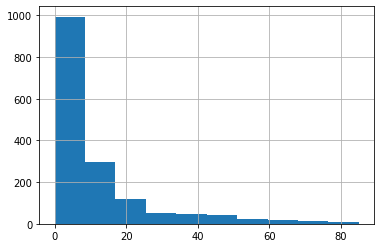

In [195]:
hist = employee_fired['Experience'].hist()

## Work experience for still working employees (on 01.12.2017)

In [196]:
experience_in_months = []
for employee_id in list(employee_stayed.index.values):
    employee_df = df[df['Emp_ID'] == employee_id]
    date_of_joining = employee_df['Dateofjoining'].unique()[0]
    last_working_day = pd.Timestamp(2017, 12, 1)
    experience_in_months.append(math.ceil((last_working_day - date_of_joining)/np.timedelta64(1, 'M')))
    
employee_stayed['Experience'] = experience_in_months

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
employee_stayed.describe()

,Emp_ID,Salary Change,Total Business Value All,Overvalue,Work Experience,Experience
count,765.000000,765.000000,7.650000e+02,765.000000,765.000000,765.000000
mean,1363.271895,0.005366,9.620626e+06,7.998073,19.401307,19.401307
std,804.270781,0.022635,1.323157e+07,8.485381,23.753914,23.753914
min,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,642.000000,0.000000,2.409200e+05,1.046599,3.000000,3.000000
50%,1325.000000,0.000000,2.636210e+06,6.121459,7.000000,7.000000
75%,2070.000000,0.000000,1.629080e+07,12.016462,29.000000,29.000000
max,2788.000000,0.111139,9.533106e+07,68.087414,93.000000,93.000000


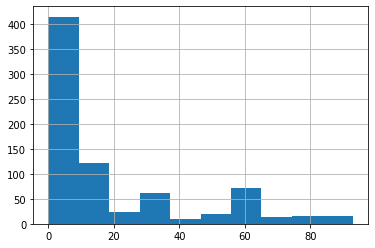

In [198]:
hist = employee_stayed['Experience'].hist()

## Fired employees who worked only one day

In [199]:
ids = employee_fired[employee_fired['Experience'] == 0]
print(ids.index.values)

[ 264 1207 1581 2397]


In [200]:
df[df['Emp_ID'] == 2397]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
16137,2017-05-01,2397,38,Female,C8,College,47818,2017-05-15,2017-05-15,2,2,0,1


## Find people who are supposed to still work but there are no records in the last month(s)

In [201]:
last_known_date = np.datetime64('2017-12-01T00:00:00.000000000')

missing_ids = []
for employee in list(employee_stayed.index.values):
    employee_df = df[df['Emp_ID'] == employee]
    records_dates = employee_df['MMM-YY'].unique()
    if last_known_date in records_dates:
        continue
    else:
        #print(False)
        missing_ids.append(employee)
        
print(missing_ids)

[66, 383, 612, 743, 755, 770, 920, 1173, 1224, 1339, 1437, 1449, 1454, 1561, 1629, 1663, 1706, 1758, 1893, 1894, 2132, 2268, 2547, 2685]


In [202]:
x = df[df['Emp_ID'] == 25]['LastWorkingDate']

## Some attempts

In [248]:
df_test = pd.read_csv('../data/test_ocLJSTx.csv')
df_test = df_test['Emp_ID'].tolist()

# Remove employees with this ids
df_train = employee_features[~employee_features['Emp_ID'].isin(df_test)]

In [256]:
y = df_train['Fired']
X = df_train.drop('Fired', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df_train['Fired'])

In [259]:
pipelines = {
       'l1': make_pipeline(StandardScaler(), 
             LogisticRegression(penalty='l1', random_state=123)),
       'l2': make_pipeline(StandardScaler(), 
             LogisticRegression(penalty='l2', random_state=123)),
       'rf': make_pipeline(
             RandomForestClassifier(random_state=123)),
       'gb': make_pipeline(
             GradientBoostingClassifier(random_state=123))
            }

In [260]:
l1_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 
                       0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                     }
l2_hyperparameters = {'logisticregression__C' : 
                       [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                        1, 5, 10, 50, 100, 500, 1000]
                     }

In [261]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
    }

In [262]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
    }

In [263]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
    }

In [265]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, 
                         hyperparameters[name], 
                         cv=10, 
                         n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [266]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.9855182926829268
l2 0.9855182926829268
rf 0.9855182926829268
gb 0.9855182926829268


Results for: l1
[[  0   5]
 [  0 323]]
Accuracy: 0.9847560975609756
Precision: 0.9847560975609756
Recall: 1.0
F1: 0.9923195084485407


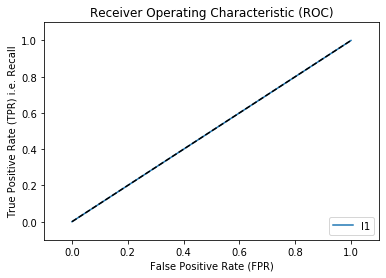

AUROC: 0.5
Results for: l2
[[  0   5]
 [  0 323]]
Accuracy: 0.9847560975609756
Precision: 0.9847560975609756
Recall: 1.0
F1: 0.9923195084485407


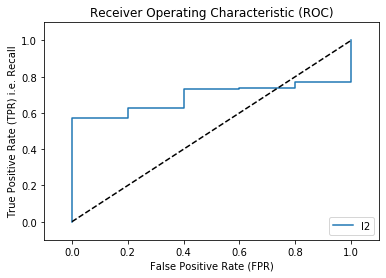

AUROC: 0.6885448916408669
Results for: rf
[[  2   3]
 [  1 322]]
Accuracy: 0.9878048780487805
Precision: 0.9907692307692307
Recall: 0.9969040247678018
F1: 0.9923195084485407


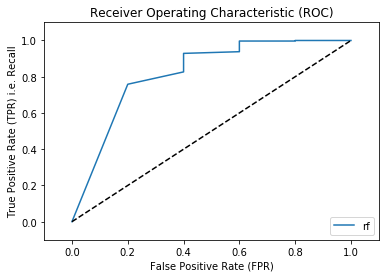

AUROC: 0.8204334365325077
Results for: gb
[[  0   5]
 [  0 323]]
Accuracy: 0.9847560975609756
Precision: 0.9847560975609756
Recall: 1.0
F1: 0.9923195084485407


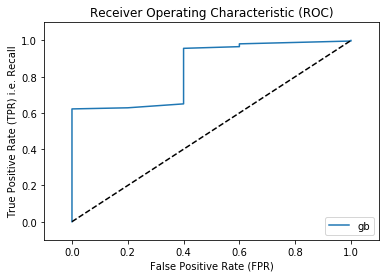

AUROC: 0.8408668730650154


In [277]:
for name, model in fitted_models.items():
    print('Results for:', name)
    
    # obtain predictions
    pred = fitted_models[name].predict(X_test)
    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)
    # accuracy score
    print('Accuracy:', accuracy_score(y_test, pred))
    
    # precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    # recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    # F1_score
    print('F1:', f1_score(y_test, [True,]*len(y_test)))
    
    # obtain prediction probabilities
    pred = fitted_models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    # plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, pred) 
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate (TPR) i.e. Recall')
    plt.xlabel('False Positive Rate (FPR)')
    plt.show()
    
    # AUROC score
    print('AUROC:', roc_auc_score(y_test, pred))

## Predict values

In [293]:
df_test = pd.read_csv('../data/test_ocLJSTx.csv')
df_test = df_test['Emp_ID'].tolist()
result = employee_features[employee_features['Emp_ID'].isin(df_test)]
y_final = result['Fired']
X_final = result.drop('Fired', axis=1)

In [294]:
final = fitted_models[name].predict(X_final)

In [298]:
df_test = pd.read_csv('../data/test_ocLJSTx.csv')
df_test['Target'] = final.astype(int)

In [301]:
df_test.to_csv('output.csv', index=False)